In [1]:
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from nltk.tokenize import TreebankWordTokenizer

In [3]:
raw_text=pd.read_csv("stackexchange_812k.csv", parse_dates=True)

In [4]:
raw_text.head()

,post_id,parent_id,comment_id,text,category
0,1,NaN,NaN,Eliciting priors from experts,title
1,2,NaN,NaN,What is normality?,title
2,3,NaN,NaN,What are some valuable Statistical Analysis op...,title
3,4,NaN,NaN,Assessing the significance of differences in d...,title
4,6,NaN,NaN,The Two Cultures: statistics vs. machine learn...,title


In [8]:
raw_text.shape

(812132, 5)

In [13]:
# remove html tag
def strip_html_tags(text):
    soup=BeautifulSoup(text)
    return soup.get_text()

# remove content brackted by <>
def brac_remove(text):
    pattern = r'(<(.*)>)'
    return re.sub(pattern, ' ', text)
    
# remove latex brackted by $
def latex_remove(text):
    pattern = r'(\$(.*)\$)'
    return re.sub(pattern, ' ', text)

# remove line breaks 
def line_break_remove(text):
    pattern=r'(\n)'
    return re.sub(pattern,' ',text)


# convert all letters into small
def convert_small(text):
    return text.lower()


# only keep character and certain punctuations
def keep_char(text):
    pattern = r'[a-z,.:! ]'
    x=re.compile(pattern)
    return ''.join(x.findall(text))




In [ ]:
raw_text['text_processed']=raw_text['text'].map(strip_html_tags).map(brac_remove).map(latex_remove).map(line_break_remove).map(convert_small).map(keep_char)

In [15]:
# rm multiple spaces & leading/trailing strip
raw_text['text_processed']=raw_text['text_processed'].apply(lambda x: re.sub(r'\s+',' ', x))
raw_text['text_processed']=raw_text['text_processed'].apply(lambda x: x.strip())
# rm urls
raw_text['text_processed'] = raw_text.text_processed.apply(lambda x : re.sub("http\S+",' ', x) )



In [46]:
# may need python -m spacy download en
import spacy
nlp = spacy.load("en_core_web_sm", disable=['ner', 'parser', 'tagger'])
raw_text['tokens']=raw_text['text_processed'].apply(lambda t: nlp(t))  

In [64]:
# check length of strings, remove strings too ldong/short
raw_text['length']=raw_text['tokens'].apply(lambda x: len(x))

In [65]:
raw_text['length'].describe()

count    812132.000000
mean         62.224052
std         104.836329
min           0.000000
25%          15.000000
50%          35.000000
75%          71.000000
max       10826.000000
Name: length, dtype: float64

In [70]:
import numpy as np
np.quantile(raw_text['length'], [0.01, 0.05, 0.1,0.5, 0.9, 0.95, 0.99])

array([  3.,   6.,   8.,  35., 126., 212., 460.])

In [76]:
# select the middle 90% data
raw_text_moderatesize=raw_text[(raw_text['length']>3) & (raw_text['length']<460)]

In [77]:
raw_text_moderatesize.shape

(792010, 8)

In [78]:
raw_text_moderatesize.head()

,post_id,parent_id,comment_id,text,category,text_processed,length,tokens
0,1,NaN,NaN,Eliciting priors from experts,title,eliciting priors from experts,4,"(eliciting, priors, from, experts)"
2,3,NaN,NaN,What are some valuable Statistical Analysis op...,title,what are some valuable statistical analysis op...,9,"(what, are, some, valuable, statistical, analy..."
3,4,NaN,NaN,Assessing the significance of differences in d...,title,assessing the significance of differences in d...,7,"(assessing, the, significance, of, differences..."
4,6,NaN,NaN,The Two Cultures: statistics vs. machine learn...,title,the two cultures: statistics vs. machine learning,8,"(the, two, cultures, :, statistics, vs., machi..."
5,7,NaN,NaN,Locating freely available data samples,title,locating freely available data samples,5,"(locating, freely, available, data, samples)"


In [89]:
raw_text_moderatesize.to_csv('stackexchange_812k_processed.csv',  index = False)

In [ ]:
# some data check

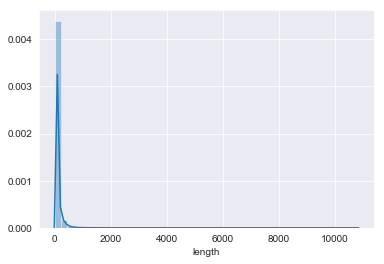

In [79]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(raw_text['length'])

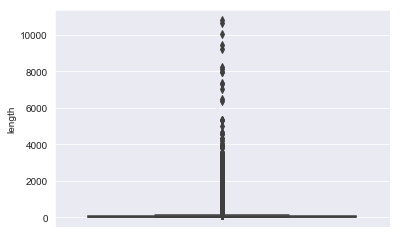

In [80]:
ax = sns.boxplot(y=raw_text['length'])

In [81]:
# visual check if html tags such as <p> is removed.
raw_text[['text', 'text_processed']][raw_text['text'].str.find('<p>')>-1].head()

,text,text_processed
91752,<p>How should I elicit prior distributions fro...,how should i elicit prior distributions from e...
91753,<p>In many different statistical methods there...,in many different statistical methods there is...
91754,<p>What are some valuable Statistical Analysis...,what are some valuable statistical analysis op...
91755,<p>I have two groups of data. Each with a dif...,i have two groups of data. each with a differe...
91756,"<p>The R-project</p>\n\n<p><a href=""http://www...",the rproject r is valuable and significant b...
